In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
# Path to Training and Testing datasets

train = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train"
valid = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val"

In [3]:
image_size = (224, 224)
batch_size = 32

# Data Augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Data normalization for the validation set
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
# Generate training data using data augmentation
train_generator = train_datagen.flow_from_directory(
    directory=train,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 10000 images belonging to 10 classes.


In [6]:
# Validation data generator
valid_generator = valid_datagen.flow_from_directory(
    directory=valid,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 984 images belonging to 10 classes.


In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
# Function to display random images from the directory
def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return
    
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return
    
    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))
    
    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)
    
    plt.tight_layout()
    plt.show()

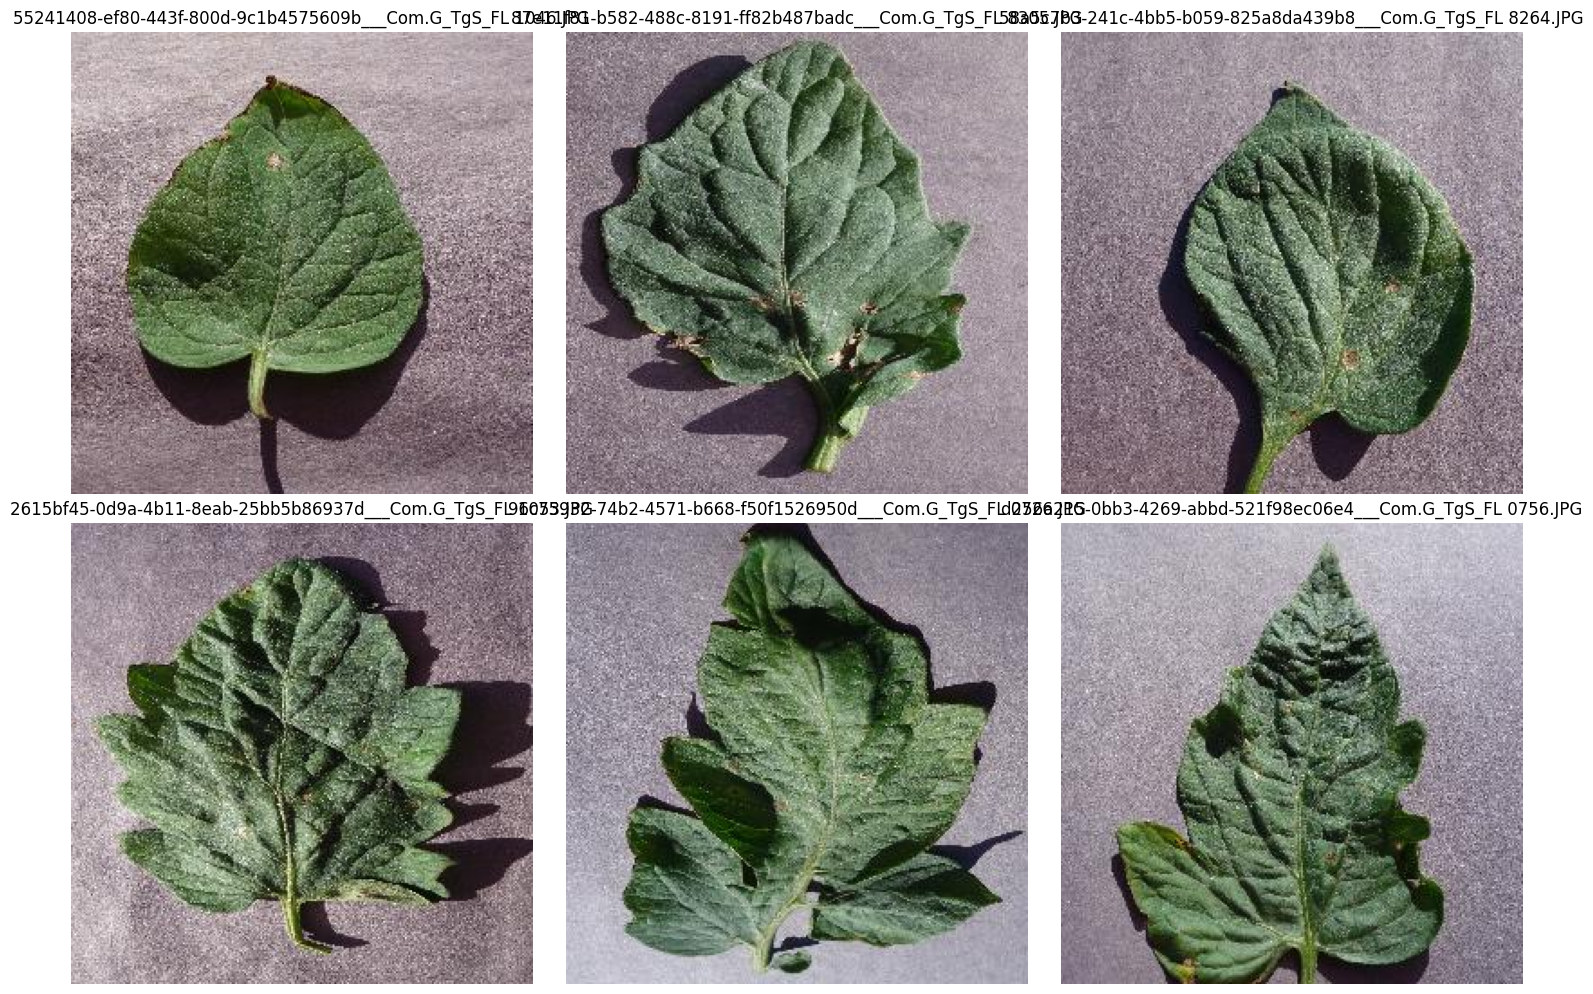

In [9]:
# Call the display functions for 6 images
display_random_images(train, num_images=6, num_columns=3)

In [10]:
# Function for data cleaning and analysis
import pandas as pd

def data_cleaning_and_analysis(directory):
    # Check for missing values
    missing_values = pd.DataFrame(columns=['Subfolder', 'Missing Images'])
    
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    for subfolder in subfolders:
        subfolder_path = os.path.join(directory, subfolder)
        image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        num_missing_images = len(os.listdir(subfolder_path)) - len(image_files)
        missing_values = pd.concat([missing_values, pd.DataFrame({'Subfolder': [subfolder], 'Missing Images': [num_missing_images]})], ignore_index=True)
    
    # Display missing values information
    print("Missing Values Information:")
    print(missing_values)
    
    # Explore class distribution
    class_distribution = pd.DataFrame(columns=['Class', 'Number of Images'])
    for subfolder in subfolders:
        subfolder_path = os.path.join(directory, subfolder)
        num_images = len([filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))])
        class_distribution = pd.concat([class_distribution, pd.DataFrame({'Class': [subfolder], 'Number of Images':[num_images]})], ignore_index=True)
    
    # Display class distribution information
    print("\nClass Distribution Information:")
    print(class_distribution)

    # Visualize the distribution of images across different classes
    plt.figure(figsize=(12, 6))
    plt.bar(class_distribution['Class'], class_distribution['Number of Images'], color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images Across Classes')
    plt.show()

Missing Values Information:
                                       Subfolder Missing Images
0                        Tomato___Bacterial_spot              0
1                          Tomato___Early_blight              0
2                               Tomato___healthy              0
3                           Tomato___Late_blight              0
4                             Tomato___Leaf_Mold              0
5                    Tomato___Septoria_leaf_spot              0
6  Tomato___Spider_mites Two-spotted_spider_mite              0
7                           Tomato___Target_Spot              0
8                   Tomato___Tomato_mosaic_virus              0
9         Tomato___Tomato_Yellow_Leaf_Curl_Virus              0

Class Distribution Information:
                                           Class Number of Images
0                        Tomato___Bacterial_spot             1000
1                          Tomato___Early_blight             1000
2                               Tomat

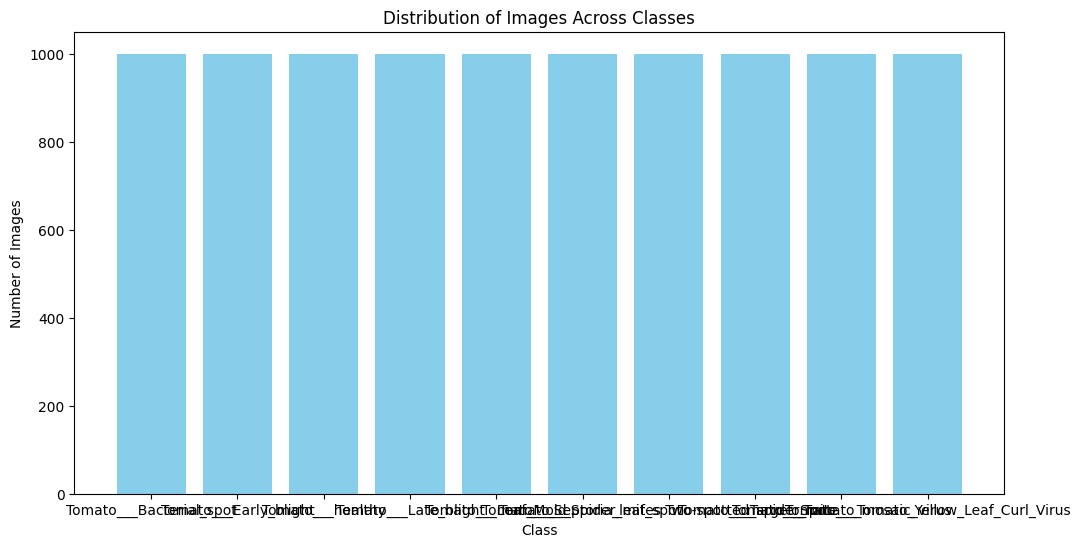

In [11]:
data_cleaning_and_analysis(train)

Missing Values Information:
                                       Subfolder Missing Images
0                        Tomato___Bacterial_spot              0
1                          Tomato___Early_blight              0
2                               Tomato___healthy              0
3                           Tomato___Late_blight              0
4                             Tomato___Leaf_Mold              0
5                    Tomato___Septoria_leaf_spot              0
6  Tomato___Spider_mites Two-spotted_spider_mite              0
7                           Tomato___Target_Spot              0
8                   Tomato___Tomato_mosaic_virus              0
9         Tomato___Tomato_Yellow_Leaf_Curl_Virus              0

Class Distribution Information:
                                           Class Number of Images
0                        Tomato___Bacterial_spot              100
1                          Tomato___Early_blight              100
2                               Tomat

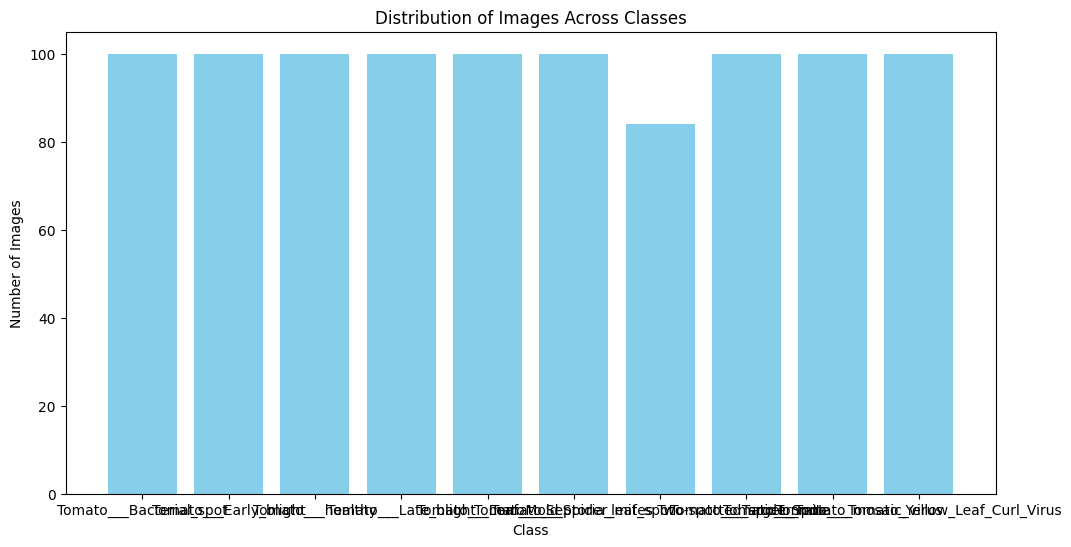

In [12]:
data_cleaning_and_analysis(valid)